# PUI midterm

## Part 1: Multiple choice and theoretic questions
Please write and explain your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

Answer:C F   
F :We reject null because pvalue is less than significance level. In the question, pvalue is 0.04 . So we can reject the null hypothesis when we have significance level 0.05.  
C: For c, pvalues are different and it means means are different.

### Question 2. What is true regarding normal and log-normal distributions (select all that applies):
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

Answer：C   
By using logarithmic mathematics, a normal distribution can be converted to a log-normal distribution.  

### Question 3. 
Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical
(repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice: The volume of data is large and it is difficult to label the subtle differences in the data so supervised learning cannot be performed. It is difficult to classify the differences accurately without supervised learning.

Answer: C

### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

Answer:    
The division of the original data into three datasets is to prevent overfitting of the model. When all the original data are used to train the model, the result obtained is likely that the model fits the original data to the maximum extent possible. The model is there to fit all the original data. When a new sample comes in and the model is used to make predictions, the results may not be as good as a model trained using only a portion of the data. So we need to classify the dataset.  
For example,  When the training depth is becoming deeper and the validation is becoming worse, we should stop training at a deeper depth. 
So if we want to confirm whether the model is overfitting during training data, we need to use the validation set.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 2: NYPD data analysis

In this part, you need to download New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

###  download NYPD complaints data:
two options:
1. download with curl or urllib methods
2. download with API

you can also manually download here: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
#!curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_Complain.csv

In [3]:
#import urllib
#urllib.request.urlretrieve ("https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD", 
                           # "NYPD_Complain.csv")

In [4]:
# !curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

In [5]:
# !wget https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD

In [6]:
# !wget https://www.dropbox.com/s/u78fk8g0wkf3xwu/NYPD_data.csv?dl=0

### read data

In [7]:
data = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


In [8]:
df = data[['CMPLNT_NUM','CMPLNT_FR_DT','CMPLNT_FR_TM','OFNS_DESC','BORO_NM','PARKS_NM','Latitude','Longitude']]

In [9]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude
0,506547392,03/29/2018,20:30:00,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,NaN,40.810877,-73.941064
1,629632833,02/06/2018,23:15:00,PETIT LARCENY,BRONX,NaN,40.873671,-73.908014
2,787203902,11/21/2018,00:15:00,PETIT LARCENY,BROOKLYN,NaN,40.651782,-73.885457
3,280364018,06/09/2018,21:42:00,OFF. AGNST PUB ORD SENSBLTY &,MANHATTAN,NaN,40.759310,-73.994706
4,985800320,11/10/2018,19:40:00,PETIT LARCENY,MANHATTAN,NaN,40.764536,-73.970728


In [10]:
df.dtypes

CMPLNT_NUM        int64
CMPLNT_FR_DT     object
CMPLNT_FR_TM     object
OFNS_DESC        object
BORO_NM          object
PARKS_NM         object
Latitude        float64
Longitude       float64
dtype: object

The complete data dictionary is here: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf. 

The focus of this notebook would be on following columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [11]:
df['time'] = df['CMPLNT_FR_DT']+'/'+df['CMPLNT_FR_TM']
df['time'] = pd.to_datetime(df['time'] ,errors='coerce')

In [12]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'],errors='coerce')

In [13]:
# code here 
# make sure to convert date column to datetime
#df['time'] = pd.to_datetime((df['CMPLNT_FR_DT']+df['CMPLNT_FR_TM']),errors='coerce')

In [14]:
df.dtypes

CMPLNT_NUM               int64
CMPLNT_FR_DT    datetime64[ns]
CMPLNT_FR_TM            object
OFNS_DESC               object
BORO_NM                 object
PARKS_NM                object
Latitude               float64
Longitude              float64
time            datetime64[ns]
dtype: object

In [15]:
df['CMPLNT_FR_TM'] = pd.to_timedelta(df['CMPLNT_FR_TM'],unit='W',errors='coerce')

In [16]:
### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the datadf.shape

(7825499, 9)

In [17]:
df = df.dropna(subset = ['CMPLNT_FR_DT','CMPLNT_FR_TM','time'])

In [18]:
df.shape

(7824663, 9)

In [19]:
df = df.dropna(subset =['BORO_NM'])

In [20]:
df.shape

(7812184, 9)

In [81]:
df = df.drop_duplicates(subset=['CMPLNT_NUM']) 

In [22]:
df.shape

(7808233, 9)

### 2. Remove rows where location is parks or greenspace and keep rows for 2019 and after

In [23]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN
df_parks = df.dropna(subset =['PARKS_NM'])
df_parks_index = df_parks.index.to_list()
df_noparks = df[~df.index.isin(df_parks_index)]

In [24]:
df_noparks['PARKS_NM'].unique()

array([nan], dtype=object)

In [25]:
df_noparks.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,time
0,506547392,2018-03-29,0 days 20:30:00,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,NaN,40.810877,-73.941064,2018-03-29 20:30:00
1,629632833,2018-02-06,0 days 23:15:00,PETIT LARCENY,BRONX,NaN,40.873671,-73.908014,2018-02-06 23:15:00
2,787203902,2018-11-21,0 days 00:15:00,PETIT LARCENY,BROOKLYN,NaN,40.651782,-73.885457,2018-11-21 00:15:00
3,280364018,2018-06-09,0 days 21:42:00,OFF. AGNST PUB ORD SENSBLTY &,MANHATTAN,NaN,40.759310,-73.994706,2018-06-09 21:42:00
4,985800320,2018-11-10,0 days 19:40:00,PETIT LARCENY,MANHATTAN,NaN,40.764536,-73.970728,2018-11-10 19:40:00


In [91]:
df_noparks.shape

(7777410, 9)

In [26]:
## check the timeline of data
(df_noparks['CMPLNT_FR_DT'].min(), df_noparks['CMPLNT_FR_DT'].max())

(Timestamp('1900-03-10 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [27]:
# remove data <2019
df_noparks_2019 = df_noparks.loc[df_noparks['CMPLNT_FR_DT']>=pd.to_datetime('1/1/2019')]

In [28]:
(df_noparks_2019['CMPLNT_FR_DT'].min(), df_noparks_2019['CMPLNT_FR_DT'].max())

(Timestamp('2019-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [29]:
df_noparks_2019.shape

(1297955, 9)

### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [30]:
# code here
crime_list = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,
              'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']

In [31]:
df_noparks_2019_in_crimelist = df_noparks_2019[df_noparks_2019['OFNS_DESC'].isin(crime_list)]

In [32]:
df_noparks_2019_in_crimelist.shape

(287016, 9)

### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [33]:
## zip codes map
zips = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')

Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [92]:
zips.shape

(263, 13)

<AxesSubplot:>

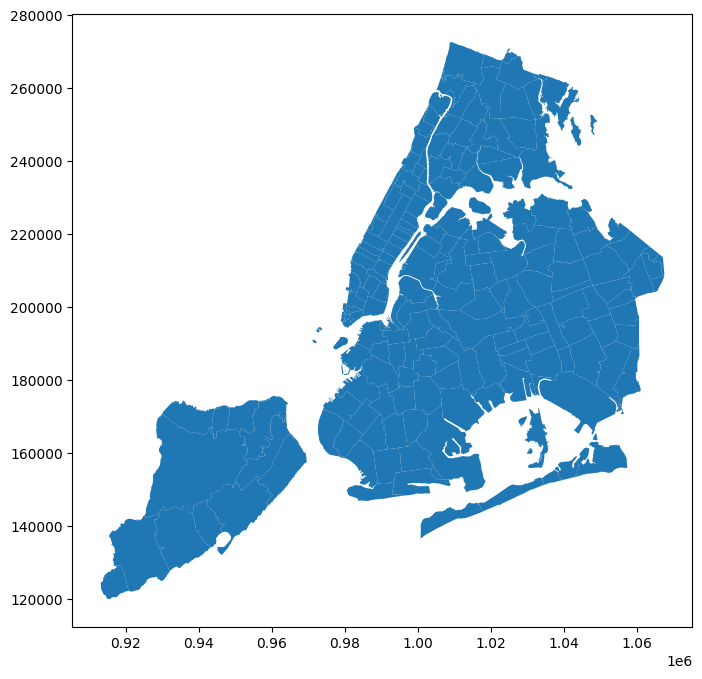

In [35]:
zips.plot(figsize=(8,8))

In [36]:
geometry = [Point(xy) for xy in zip(df_noparks_2019_in_crimelist.Longitude, df_noparks_2019_in_crimelist.Latitude)]
DF = gpd.GeoDataFrame(df_noparks_2019_in_crimelist,geometry=geometry,crs={'init': 'epsg:4326'})

In [37]:
zips.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."


In [38]:
DF_1 = DF.to_crs(zips.crs)
DF_1.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,time,geometry
681150,123171799,2021-12-31,0 days 21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,2021-12-31 21:15:00,POINT (1021341.605 237280.017)
681170,725872999,2021-12-21,0 days 23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,2021-12-21 23:00:00,POINT (1032309.607 252553.020)
681210,195931501,2019-12-30,0 days 19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,2019-12-30 19:20:00,POINT (991600.600 215958.012)


In [39]:
#NYC = gpd.sjoin(DF_1,zips,op='within',how='left')
#NYC=NYC.dropna(subset=['ZIPCODE'])
#NYC.head()
NYC=gpd.sjoin(DF_1,zips,how='left')
NYC=NYC.dropna(subset=['ZIPCODE'])
NYC.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,time,geometry,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
681150,123171799,2021-12-31,0 days 21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,2021-12-31 21:15:00,POINT (1021341.605 237280.017),...,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
681170,725872999,2021-12-21,0 days 23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,2021-12-21 23:00:00,POINT (1032309.607 252553.020),...,Bronx,40931.0,3.863330e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
681210,195931501,2019-12-30,0 days 19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,2019-12-30 19:20:00,POINT (991600.600 215958.012),...,New York,33135.0,1.272834e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
681252,696904327,2019-12-29,0 days 13:15:00,GRAND LARCENY OF MOTOR VEHICLE,BROOKLYN,NaN,40.674397,-73.951466,2019-12-29 13:15:00,POINT (997712.602 184981.006),...,Brooklyn,53862.0,2.647823e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0
681332,730604096,2021-12-26,0 days 12:00:00,GRAND LARCENY,BRONX,NaN,40.824075,-73.908711,2021-12-26 12:00:00,POINT (1009515.603 239523.017),...,Bronx,89390.0,2.993345e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0


In [40]:
NYC.shape

(287012, 23)

In [93]:
#NYC['POPULATION'].sum()

## Section 2 -Exploratory analysis tasks

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough


### 1. time series plotting

In [99]:
NYdata = NYC#!!!

In [100]:
# group total crimes by daily numbers
NYdata1 = NYdata.groupby(['CMPLNT_FR_DT']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()

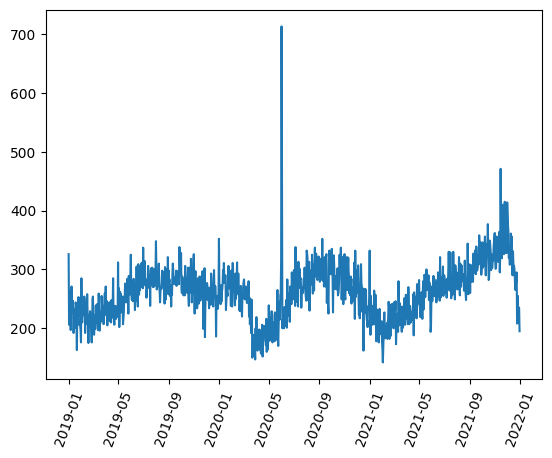

In [101]:
# plot as a time series
plt.plot(NYdata1['CMPLNT_FR_DT'], NYdata1['count'])
plt.xticks(rotation=70);#rotation指的是坐标轴上面的子旋转的角度
plt.show()

### 2. plotting on borough and zip code level normalized by population

In [102]:
# group crime numbers by borough and normalize by their population (per 100,000). 
#Population is given in the zips shapefile

NYdata_byBoro = NYdata.groupby(['BORO_NM']).\
            agg({'CMPLNT_NUM':'count'}).reset_index()

NYdata_byBoro['rate']=NYdata_byBoro['CMPLNT_NUM']/(100000)

In [103]:
NYdata_byBoro.head()

,BORO_NM,CMPLNT_NUM,rate
0,BRONX,62295,0.62295
1,BROOKLYN,80816,0.80816
2,MANHATTAN,77449,0.77449
3,QUEENS,59173,0.59173
4,STATEN ISLAND,7279,0.07279


Text(0.5, 0, 'BORO')

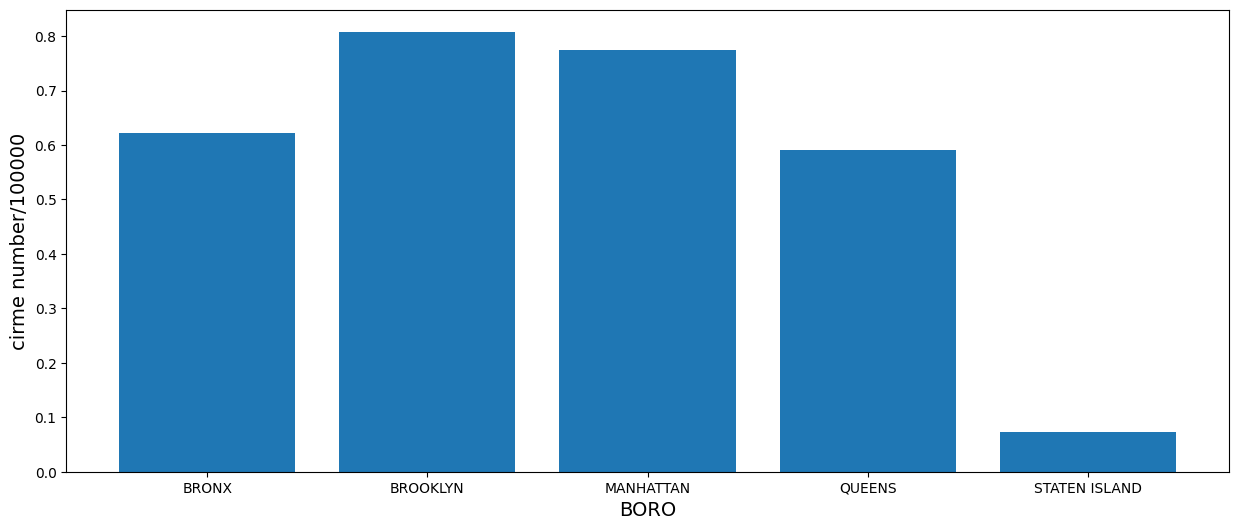

In [139]:
# plot as a bar plot

plt.figure(figsize=(15, 6))
plt.bar(NYdata_byBoro['BORO_NM'], NYdata_byBoro['rate'])
plt.ylabel('cirme number/100000', fontsize=14)
plt.xlabel('BORO', fontsize=14)

In [105]:
#NYdata.head()

In [141]:
# now group by zip codes, normalize by their population
NYdata_byZip = NYdata.groupby(['ZIPCODE']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()

In [142]:
NYdata_byZip.shape

(194, 2)

In [143]:
NYdata_byZip.head()

,ZIPCODE,count
0,00083,196
1,10001,4322
2,10002,3703
3,10003,3095
4,10004,251


In [144]:

from geopandas import GeoDataFrame
NYdata_byZip=NYdata_byZip.merge(zips, left_on='ZIPCODE', right_on='ZIPCODE')
NYdata_byZip=GeoDataFrame(NYdata_byZip)
NYdata_byZip['count']=NYdata_byZip['count']/100000

In [145]:
#NYdata_byZip.head()

<AxesSubplot:>

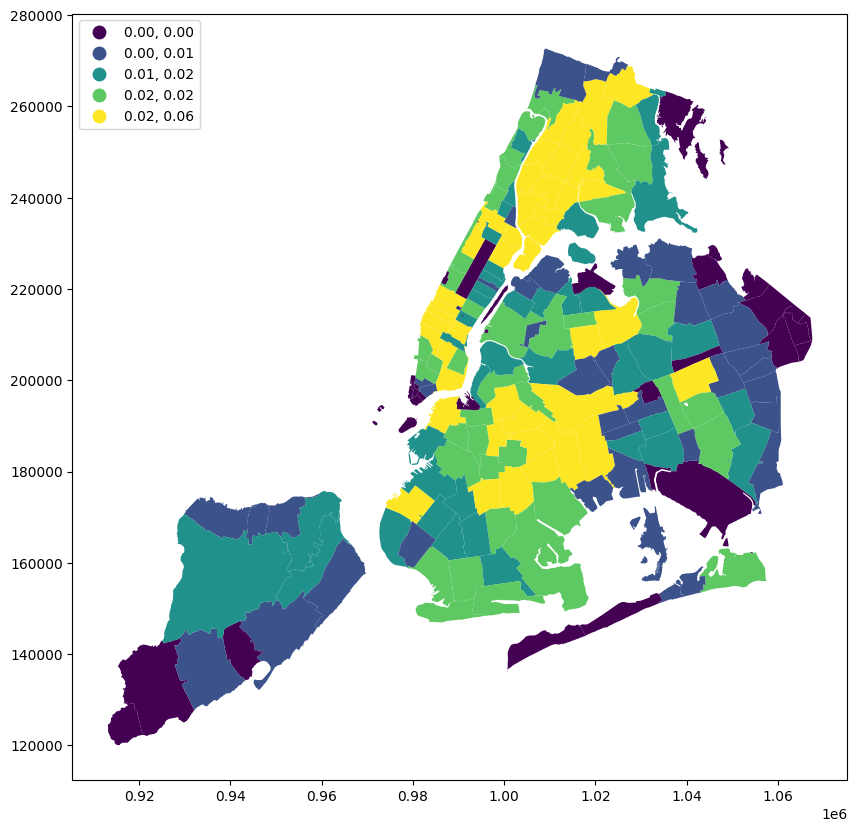

In [146]:
# plot as a heatmap with quantiles color scheme
fig, ax = plt.subplots(1, figsize=(10,10))

NYdata_byZip.plot(ax=ax, column='count', scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

### 3. bar plots of total type 1 crimes vs a) months b) day of week and c) hour of day

In [111]:
NYdataBYTime = NYdata

In [112]:
# code here
NYdataBYTime['Month'] = NYdata['time'].dt.month
NYdataBYTime['Date'] = NYdata['time'].dt.date
NYdataBYTime['DOW'] = NYdata['time'].dt.dayofweek
NYdataBYTime['Hour'] = NYdata['time'].dt.hour
NYdataBYTime =NYdataBYTime.sort_values(by = 'time')
NYdataBYTime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,time,geometry,...,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,Date,DOW,Hour
925561,354640600,2019-01-01,0 days,GRAND LARCENY OF MOTOR VEHICLE,QUEENS,NaN,40.692418,-73.783913,2019-01-01,POINT (1044173.611 191617.008),...,Queens,36,081,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
948192,215788290,2019-01-01,0 days,RAPE,BROOKLYN,NaN,40.671107,-73.881433,2019-01-01,POINT (1017140.606 183801.006),...,Kings,36,047,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
1109692,768316848,2019-01-01,0 days,BURGLARY,QUEENS,NaN,40.695962,-73.772563,2019-01-01,POINT (1047317.611 192916.009),...,Queens,36,081,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
999150,549164128,2019-01-01,0 days,GRAND LARCENY,BRONX,NaN,40.806201,-73.915989,2019-01-01,POINT (1007507.603 233009.015),...,Bronx,36,005,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
1207298,358600800,2019-01-01,0 days,BURGLARY,BRONX,NaN,40.889583,-73.859495,2019-01-01,POINT (1023098.605 263408.022),...,Bronx,36,005,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0


Text(0.5, 0, 'Month')

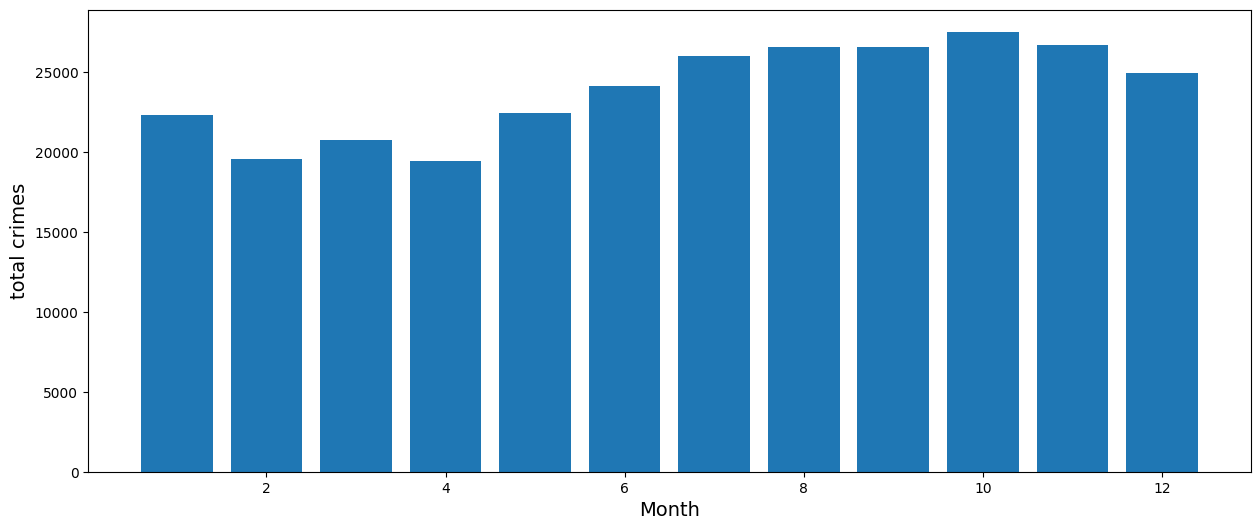

In [113]:
NYdataBYTimebymonth = NYdataBYTime.groupby(['Month']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()
plt.figure(figsize=(15, 6))
plt.bar(NYdataBYTimebymonth['Month'], NYdataBYTimebymonth['count'])
plt.ylabel('total crimes', fontsize=14)
plt.xlabel('Month', fontsize=14)

Text(0.5, 0, 'DOW')

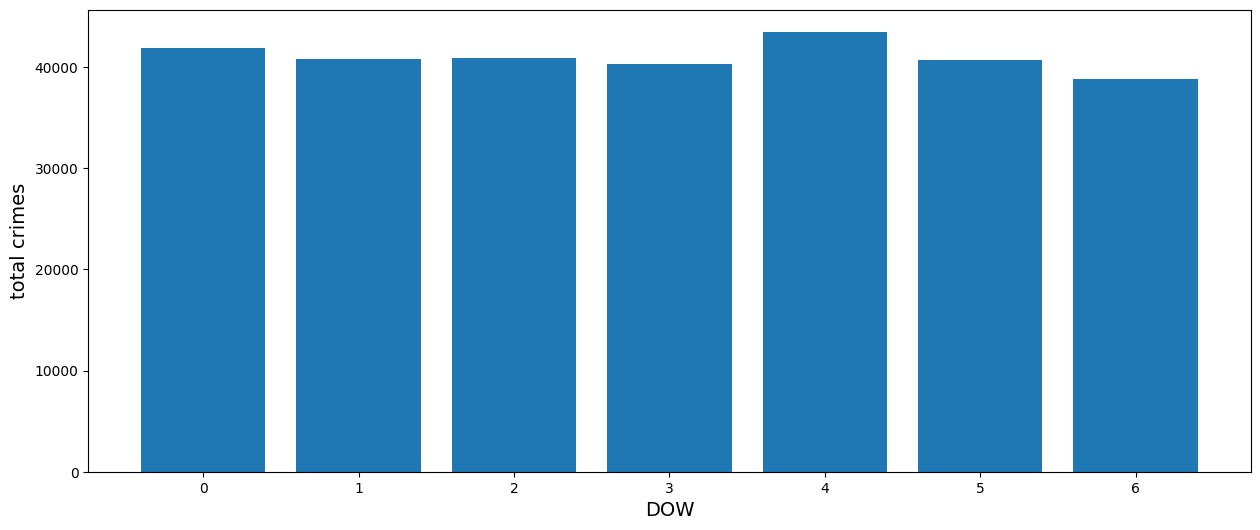

In [114]:
NYdataBYTimebyDOW = NYdataBYTime.groupby(['DOW']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()
plt.figure(figsize=(15, 6))
plt.bar(NYdataBYTimebyDOW['DOW'], NYdataBYTimebyDOW['count'])
plt.ylabel('total crimes', fontsize=14)
plt.xlabel('DOW', fontsize=14)

Text(0.5, 0, 'Hour')

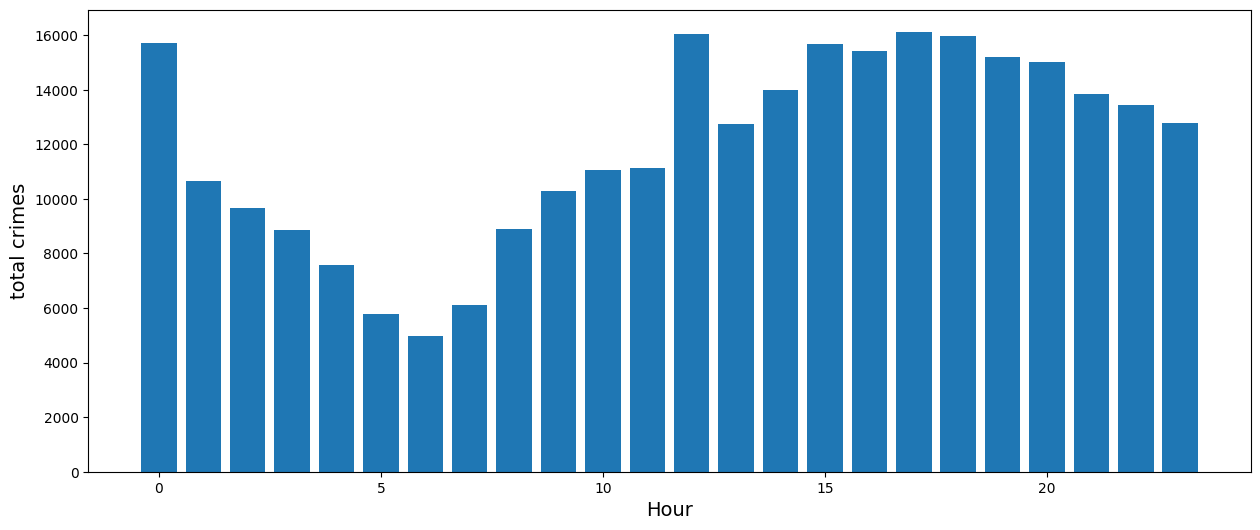

In [115]:
NYdataBYTimebyHour = NYdataBYTime.groupby(['Hour']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()
plt.figure(figsize=(15, 6))
plt.bar(NYdataBYTimebyHour['Hour'], NYdataBYTimebyHour['count'])
plt.ylabel('total crimes', fontsize=14)
plt.xlabel('Hour', fontsize=14)

### 4. Bar plots: Felony assault vs grand larceny grouped by a) day of week and b) hour of day

In [116]:
# filter data for above crime types
NYdataBYTime_2 = NYdataBYTime[NYdataBYTime.OFNS_DESC.isin(['FELONY ASSAULT', 'GRAND LARCENY'])]

In [117]:
NYdataBYTime_2.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,time,geometry,...,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,Date,DOW,Hour
999150,549164128,2019-01-01,0 days,GRAND LARCENY,BRONX,NaN,40.806201,-73.915989,2019-01-01,POINT (1007507.603 233009.015),...,Bronx,36,005,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
1205596,850547567,2019-01-01,0 days,FELONY ASSAULT,BRONX,NaN,40.813630,-73.910951,2019-01-01,POINT (1008899.602 235717.016),...,Bronx,36,005,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
1151865,706427810,2019-01-01,0 days,GRAND LARCENY,QUEENS,NaN,40.744451,-73.831540,2019-01-01,POINT (1030929.608 210545.012),...,Queens,36,081,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
849367,891475652,2019-01-01,0 days,GRAND LARCENY,BROOKLYN,NaN,40.662308,-73.882130,2019-01-01,POINT (1016951.606 180595.006),...,Kings,36,047,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0
1158361,715807381,2019-01-01,0 days,GRAND LARCENY,MANHATTAN,NaN,40.806490,-73.966271,2019-01-01,POINT (993587.600 233105.015),...,New York,36,061,http://www.usps.com/,0.0,0.0,1,2019-01-01,1,0


In [149]:
# group the numbers and normalize by total city population (per 100,000)
NYdataBYTime_2DOW=NYdataBYTime_2.groupby(["OFNS_DESC",'DOW']).\
                agg({'CMPLNT_NUM':'count','POPULATION':'sum'}).\
                rename(columns={'CMPLNT_NUM':'count'}).reset_index()
NYdataBYTime_2DOW['rate']=NYdataBYTime_2DOW['count']/(100000)
NYdataBYTime_2DOW=NYdataBYTime_2DOW.reset_index()

NYdataBYTime_Felony = NYdataBYTime_2DOW[NYdataBYTime_2DOW['OFNS_DESC']=='FELONY ASSAULT']
NYdataBYTime_LARCENY = NYdataBYTime_2DOW[NYdataBYTime_2DOW['OFNS_DESC']=='GRAND LARCENY']


In [150]:
NYdataBYTime_Felony

,index,OFNS_DESC,DOW,count,POPULATION,rate
0,0,FELONY ASSAULT,0,8613,524601040.0,0.08613
1,1,FELONY ASSAULT,1,8100,493436225.0,0.08100
2,2,FELONY ASSAULT,2,8457,518268500.0,0.08457
3,3,FELONY ASSAULT,3,8292,505147990.0,0.08292
4,4,FELONY ASSAULT,4,8895,547115472.0,0.08895
5,5,FELONY ASSAULT,5,10256,631133747.0,0.10256
6,6,FELONY ASSAULT,6,10356,639364154.0,0.10356


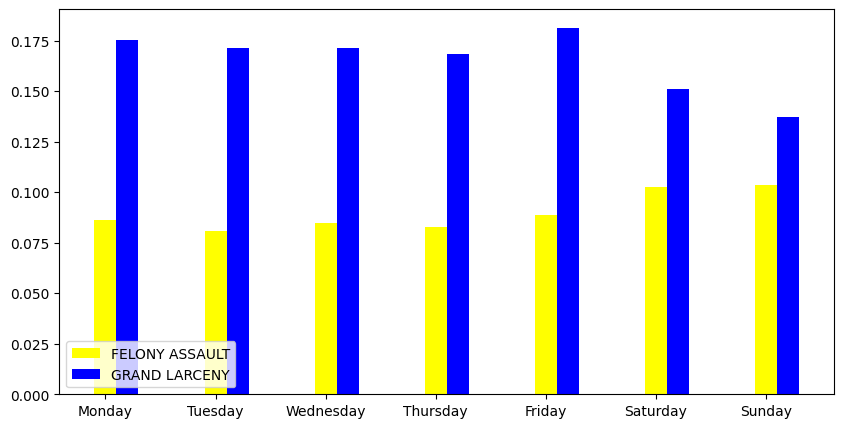

In [151]:
# plot two bar plots: one for day of week and other for hour of day
# each plot should have comparison of the two type of crime numbers (normalized) by weekday and hour respectively

day_of=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
OFNS_type=['FELONY ASSAULT','GRAND LARCENY']
fig = plt.figure(figsize = (10, 5))
pos = np.arange(len(day_of))
bar_width = 0.2
plt.bar(pos,NYdataBYTime_Felony['rate'],bar_width,color='yellow')
plt.bar(pos+bar_width,NYdataBYTime_LARCENY['rate'],bar_width,color='blue')
#plt.bar(pos+bar_width*2,row_col['Three_family'],bar_width,color='yellow',edgecolor='black')
plt.xticks(pos, day_of)
plt.legend(OFNS_type,loc=3)
plt.show()

In [152]:
NYdataBYTime_2HOUR=NYdataBYTime_2.groupby(["OFNS_DESC",'Hour']).\
                agg({'CMPLNT_NUM':'count'}).\
                rename(columns={'CMPLNT_NUM':'count'}).reset_index()
NYdataBYTime_2HOUR['rate']=NYdataBYTime_2HOUR['count']/(100000)
NYdataBYTime_2HOUR=NYdataBYTime_2HOUR.reset_index()

NYdataBYTime_Felony_2 = NYdataBYTime_2HOUR[NYdataBYTime_2HOUR['OFNS_DESC']=='FELONY ASSAULT']
NYdataBYTime_LARCENY_2 = NYdataBYTime_2HOUR[NYdataBYTime_2HOUR['OFNS_DESC']=='GRAND LARCENY']

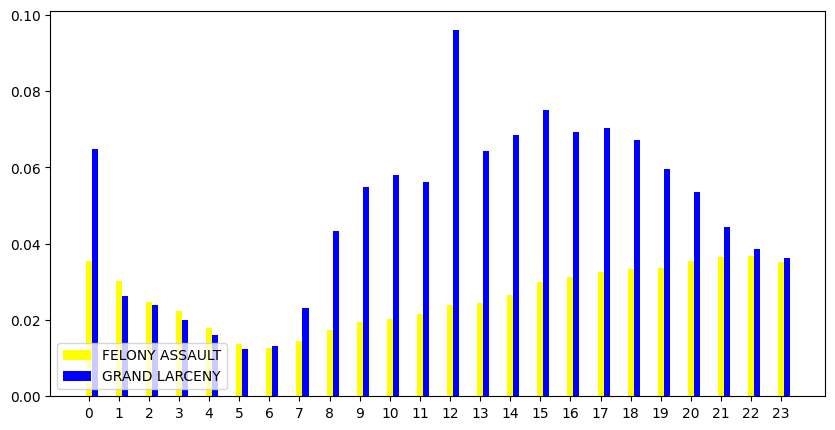

In [153]:

OFNS_type=['FELONY ASSAULT','GRAND LARCENY']
fig = plt.figure(figsize = (10, 5))
pos = np.arange(24)
bar_width = 0.2
plt.bar(pos,NYdataBYTime_Felony_2['rate'],bar_width,color='yellow')
plt.bar(pos+bar_width,NYdataBYTime_LARCENY_2['rate'],bar_width,color='blue')
#plt.bar(pos+bar_width*2,row_col['Three_family'],bar_width,color='yellow',edgecolor='black')
plt.xticks(pos, )
plt.legend(OFNS_type,loc=3)
plt.show()

### 5. comparing the %% decomposition of type 1 crimes by category of crime

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

In [123]:
NYdataBYTime.BORO_NM.unique

<bound method Series.unique of 925561        QUEENS
948192      BROOKLYN
1109692       QUEENS
999150         BRONX
1207298        BRONX
             ...    
1208724       QUEENS
744381     MANHATTAN
1209037    MANHATTAN
738272      BROOKLYN
735470     MANHATTAN
Name: BORO_NM, Length: 287012, dtype: object>

QUEENS


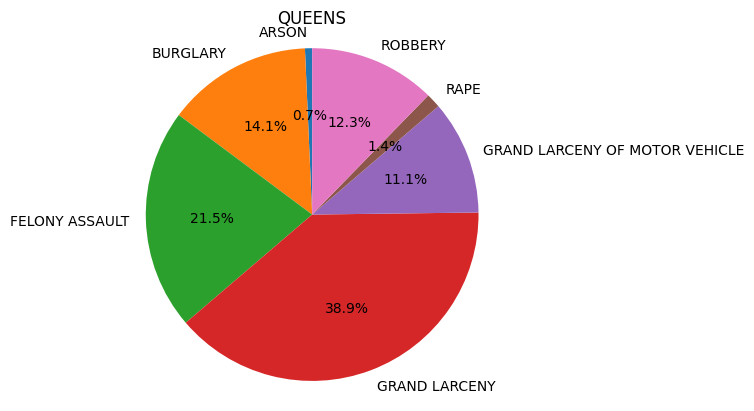

BROOKLYN


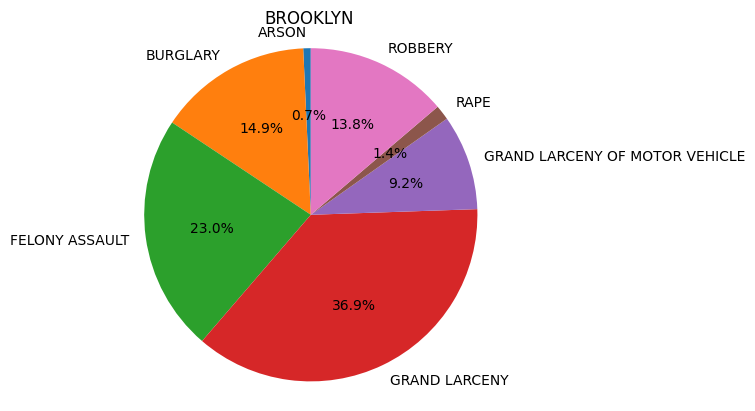

BRONX


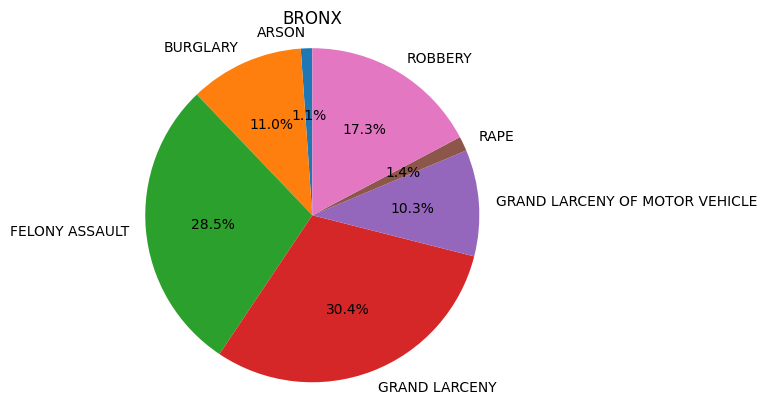

MANHATTAN


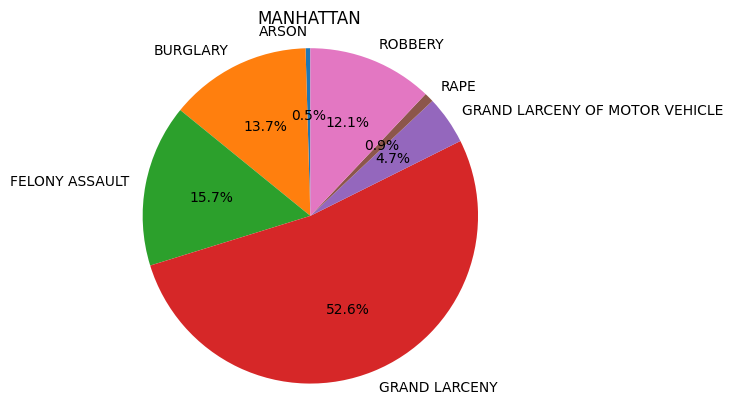

STATEN ISLAND


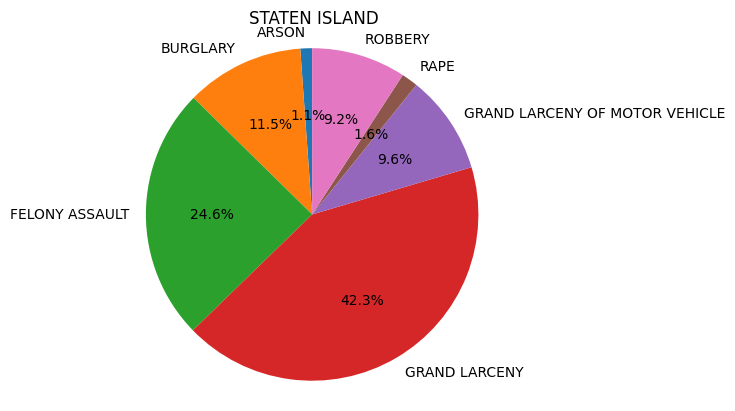

In [124]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes

for boro in NYdataBYTime.BORO_NM.unique():
    bronData=NYdataBYTime.loc[NYdataBYTime['BORO_NM']==boro]
    boroCrime=bronData.groupby(["OFNS_DESC"]).agg({'CMPLNT_NUM':'count','POPULATION':'sum'})
    lista = 'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE','RAPE', 'ROBBERY'
    sizes = boroCrime['CMPLNT_NUM']
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=lista, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal') 
    plt.title(boro)
    print(boro)
    plt.show()
   
    # complete this code here

## Section 3 - Hypothesis testing tasks

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

### 1. plotting distributions and normality test

In [156]:
#introduce the function performing distribution analysis

def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':    #fit is to get mu and sigma
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

In [164]:
# group type 1 crime numbers per day for 2019
NY3 = NYC.groupby(['CMPLNT_FR_DT']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()

NY3 = NY3[NY3['CMPLNT_FR_DT']<'2020-01-01']

In [160]:
NY3

,CMPLNT_FR_DT,count
0,2019-01-01,326
1,2019-01-02,206
2,2019-01-03,261
3,2019-01-04,263
4,2019-01-05,230
...,...,...
360,2019-12-27,236
361,2019-12-28,255
362,2019-12-29,233
363,2019-12-30,242


Mean = 256.46
Standard deviation = 33.06
1 percentile = 181.76
5 percentile = 201.20
25 percentile = 234.00
50 percentile = 260.00
75 percentile = 280.00
95 percentile = 306.00
99 percentile = 326.72


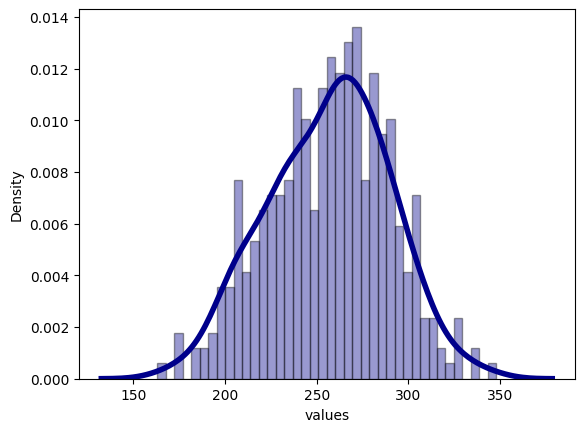

In [163]:
# plot the distribution (density plot)

distribution_analysis(NY3['count'], bins=40, vis_means = False)

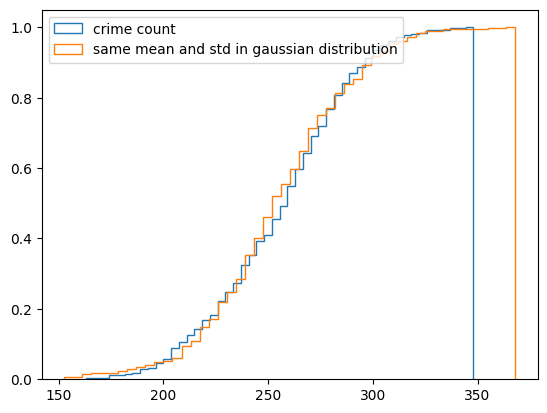

In [128]:
# normality test
plt.hist(NY3['count'].values, 50, density=True, 
         histtype='step',cumulative=True,label='crime count')
plt.hist(np.random.normal(NY3['count'].mean(), NY3['count'].std(),
                          len(NY3)), 50, density=True, 
         histtype='step',cumulative=True,label='same mean and std in gaussian distribution')
plt.legend(loc='upper left')

In [165]:
x = NY3['count']
stats.kstest(x,'norm',args=(x.mean(),x.std()))

KstestResult(statistic=0.04948516674174308, pvalue=0.322528247882222)

We can not reject the null hypothesis

In [166]:
x = np.log(NY3['count'])
stats.kstest(x,'norm',args=(x.mean(),x.std()))

KstestResult(statistic=0.07360928509306985, pvalue=0.03637997293726969)

### 2. weekdays vs weekend distribution

In [178]:
'''NYC111 = NYC.sort_values(by= 'CMPLNT_FR_DT').reset_index()

NYC222 = NYC111.groupby(['CMPLNT_FR_DT','DOW']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()
NYC222.shape'''

(1096, 3)

In [186]:
# create dataframes for weekdays and weekends
NYCWOD_weekdays1 = NYC.loc[NYC.DOW.isin([0,1,2,3,4])]
NYCWOD_weekends1 = NYC.loc[NYC.DOW.isin([5,6])]

In [187]:
NYCWOD_weekdays1.head()


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,time,geometry,...,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,Date,DOW,Hour
681150,123171799,2021-12-31,0 days 21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,2021-12-31 21:15:00,POINT (1021341.605 237280.017),...,Bronx,36,005,http://www.usps.com/,0.0,0.0,12,2021-12-31,4,21
681170,725872999,2021-12-21,0 days 23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,2021-12-21 23:00:00,POINT (1032309.607 252553.020),...,Bronx,36,005,http://www.usps.com/,0.0,0.0,12,2021-12-21,1,23
681210,195931501,2019-12-30,0 days 19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,2019-12-30 19:20:00,POINT (991600.600 215958.012),...,New York,36,061,http://www.usps.com/,0.0,0.0,12,2019-12-30,0,19
681435,320847553,2021-12-29,0 days 11:09:00,GRAND LARCENY,MANHATTAN,NaN,40.752264,-73.991559,2021-12-29 11:09:00,POINT (986588.599 213347.011),...,New York,36,061,http://www.usps.com/,0.0,0.0,12,2021-12-29,2,11
681476,176258473,2019-12-25,0 days 14:00:00,BURGLARY,QUEENS,NaN,40.728766,-73.878711,2019-12-25 14:00:00,POINT (1017866.606 204809.010),...,Queens,36,081,http://www.usps.com/,0.0,0.0,12,2019-12-25,2,14


In [188]:
# group daily numbers for weekdays and weekends
NYCWOD_weekdays = NYCWOD_weekdays1.groupby(['CMPLNT_FR_DT']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()
NYCWOD_weekdays = NYCWOD_weekdays[NYCWOD_weekdays['CMPLNT_FR_DT']<'2020-01-01']
NYCWOD_weekdays.head()

,CMPLNT_FR_DT,count
0,2019-01-01,326
1,2019-01-02,206
2,2019-01-03,261
3,2019-01-04,263
4,2019-01-07,224


In [190]:
NYCWOD_weekends = NYCWOD_weekends1.groupby(['CMPLNT_FR_DT']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'count'}).reset_index()
NYCWOD_weekends = NYCWOD_weekends[NYCWOD_weekends['CMPLNT_FR_DT']<'2020-01-01']
NYCWOD_weekends.head()

,CMPLNT_FR_DT,count
0,2019-01-05,230
1,2019-01-06,197
2,2019-01-12,234
3,2019-01-13,192
4,2019-01-19,239


In [132]:
# create dataframes for weekdays and weekends
#NYCWOD_weekdays = NYC222[NYC222['DOW']<5]
#NYCWOD_weekends = NYC222[NYC222['DOW']>=5]

In [175]:

#NYCWOD_weekdays1 = NYCWOD_weekdays.groupby(by = 'DOW').sum()
#NYCWOD_weekends1 = NYCWOD_weekends.groupby(by = 'DOW').sum()
#NYCWOD_weekends1

In [176]:
#(NYCWOD_weekends1.count,NYCWOD_weekdays1.count)

Mean = 258.64
Standard deviation = 33.57
1 percentile = 176.00
5 percentile = 202.00
25 percentile = 237.00
50 percentile = 261.00
75 percentile = 283.00
95 percentile = 310.00
99 percentile = 331.60


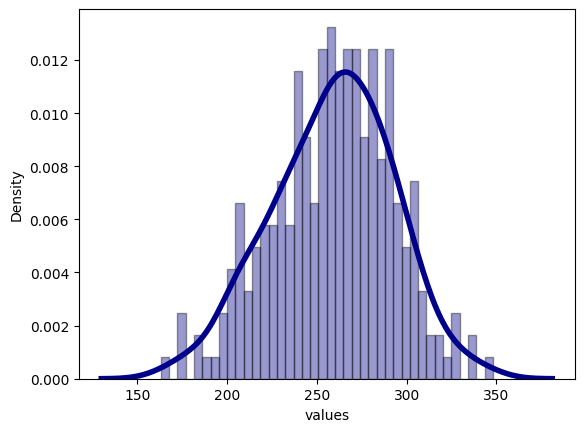

In [191]:
# plot distribution (density plot)
distribution_analysis(NYCWOD_weekdays['count'], bins=40, vis_means = False)

In [192]:
NYCWOD_weekends

,CMPLNT_FR_DT,count
0,2019-01-05,230
1,2019-01-06,197
2,2019-01-12,234
3,2019-01-13,192
4,2019-01-19,239
...,...,...
99,2019-12-15,254
100,2019-12-21,266
101,2019-12-22,257
102,2019-12-28,255


Mean = 251.00
Standard deviation = 31.24
1 percentile = 192.00
5 percentile = 199.45
25 percentile = 226.75
50 percentile = 254.00
75 percentile = 273.00
95 percentile = 301.40
99 percentile = 312.00


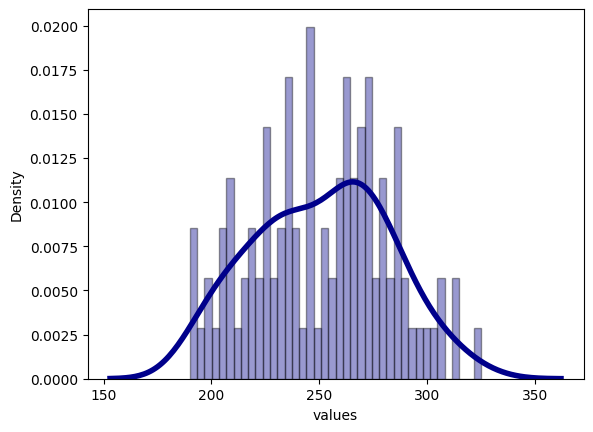

In [196]:
distribution_analysis(NYCWOD_weekends['count'], bins=40, vis_means = False)

In [197]:
# t-test
stats.ttest_ind(NYCWOD_weekdays['count'],NYCWOD_weekends['count'])

Ttest_indResult(statistic=2.000158829750483, pvalue=0.046227674532789115)

According to the T-test, the pvalue is smaller than 0.1, therefore, we reject the null hypothesis

In [198]:
# k-s test
stats.ks_2samp(NYCWOD_weekdays['count'],NYCWOD_weekends['count'])

KstestResult(statistic=0.12249484232242853, pvalue=0.1938198401763775)

According to the ks-test, the pvalue is not smaller than 0.1, therefore, we can not reject the null hypothesis